In [1]:
# importing Libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')


In [2]:
# loding the data

df=pd.read_csv(r"C:\Users\Dell\Desktop\Learnbay\ML Projects\Finance DOmain\Company data.csv")

df.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,3.85,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31
1,2,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,...,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17
2,3,92.2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,...,5.07,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8,-5.76
3,4,2.7,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7,NaN
4,5,109.0,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,...,9.46,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,NaN


In [3]:
 print(f"Data set has {df.shape[0]} rows, and {df.shape[1]} columns")

Data set has 3541 rows, and 52 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3541 entries, 0 to 3540
Data columns (total 52 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          3541 non-null   int64  
 1   Networth Next Year                           3541 non-null   float64
 2   Total assets                                 3541 non-null   float64
 3   Net worth                                    3541 non-null   float64
 4   Total income                                 3343 non-null   float64
 5   Change in stock                              3083 non-null   float64
 6   Total expenses                               3402 non-null   float64
 7   Profit after tax                             3410 non-null   float64
 8   PBDITA                                       3410 non-null   float64
 9   PBT                                          3410 non-null   float64
 10  

In [5]:
df.columns

Index(['Num', 'Networth Next Year', 'Total assets', 'Net worth',
       'Total income', 'Change in stock', 'Total expenses', 'Profit after tax',
       'PBDITA', 'PBT', 'Cash profit', 'PBDITA as % of total income',
       'PBT as % of total income', 'PAT as % of total income',
       'Cash profit as % of total income', 'PAT as % of net worth', 'Sales',
       'Income from financial services', 'Other income', 'Total capital',
       'Reserves and funds', 'Deposits (accepted by commercial banks)',
       'Borrowings', 'Current liabilities & provisions',
       'Deferred tax liability', 'Shareholders funds',
       'Cumulative retained profits', 'Capital employed', 'TOL/TNW',
       'Total term liabilities / tangible net worth',
       'Contingent liabilities / Net worth (%)', 'Contingent liabilities',
       'Net fixed assets', 'Investments', 'Current assets',
       'Net working capital', 'Quick ratio (times)', 'Current ratio (times)',
       'Debt to equity ratio (times)', 'Cash to cur

In [6]:
#modifying the column names
df.columns=df.columns.str.replace(" ","_").str.replace("%", "percent").str.replace("/", "to"). str.replace("(","").str.replace(")","")

In [7]:
df.columns

Index(['Num', 'Networth_Next_Year', 'Total_assets', 'Net_worth',
       'Total_income', 'Change_in_stock', 'Total_expenses', 'Profit_after_tax',
       'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_as_percent_of_total_income',
       'PBT_as_percent_of_total_income', 'PAT_as_percent_of_total_income',
       'Cash_profit_as_percent_of_total_income', 'PAT_as_percent_of_net_worth',
       'Sales', 'Income_from_financial_services', 'Other_income',
       'Total_capital', 'Reserves_and_funds',
       'Deposits_accepted_by_commercial_banks', 'Borrowings',
       'Current_liabilities_&_provisions', 'Deferred_tax_liability',
       'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed',
       'TOLtoTNW', 'Total_term_liabilities_to_tangible_net_worth',
       'Contingent_liabilities_to_Net_worth_percent', 'Contingent_liabilities',
       'Net_fixed_assets', 'Investments', 'Current_assets',
       'Net_working_capital', 'Quick_ratio_times', 'Current_ratio_times',
       'Debt_to_equi

In [8]:
df.describe()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
count,3541.000000,3541.000000,3.541000e+03,3541.000000,3.343000e+03,3083.000000,3.402000e+03,3410.00000,3410.000000,3410.000000,...,3213.000000,2801.000000,2901.000000,3180.000000,2.849000e+03,2849.000000,3541.000000,3541.000000,3.541000e+03,1347.000000
mean,1772.451567,1616.256199,3.443382e+03,1295.862214,4.582823e+03,41.489264,4.262931e+03,277.36044,578.056305,383.810088,...,17.041261,87.078725,27.930469,19.088399,2.206739e+07,-1333.698175,-220.316436,-221.512285,3.443382e+03,63.905687
std,1023.731393,17459.639673,3.097089e+04,13387.891867,5.568124e+04,440.573761,5.302869e+04,3064.40606,5653.770427,4117.069953,...,83.943754,598.545835,151.042868,376.340737,1.655193e+08,37500.729972,14261.946209,14261.923760,3.097089e+04,1433.809532
min,1.000000,-74265.600000,1.000000e-01,0.000000,0.000000e+00,-3029.400000,-1.000000e-01,-3908.30000,-440.700000,-3894.800000,...,0.000000,-0.090000,-0.180000,-2.000000,-2.147484e+09,-999998.900000,-843181.820000,-843181.820000,1.000000e-01,-1116.640000
25%,886.000000,31.700000,9.130000e+01,31.300000,1.064500e+02,-1.800000,9.582500e+01,0.50000,6.900000,0.700000,...,3.760000,8.200000,5.100000,2.990000,1.316250e+06,10.000000,0.000000,0.000000,9.130000e+01,3.275000
50%,1773.000000,116.300000,3.097000e+02,102.300000,4.449000e+02,1.600000,4.077000e+02,8.80000,35.400000,12.400000,...,6.320000,17.270000,9.760000,6.400000,4.672063e+06,10.000000,1.430000,1.180000,3.097000e+02,9.100000
75%,2658.000000,456.100000,1.098700e+03,377.300000,1.440900e+03,18.050000,1.359775e+03,52.27500,150.250000,71.975000,...,11.680000,40.350000,20.240000,11.845000,1.065197e+07,10.000000,9.620000,7.480000,1.098700e+03,17.790000
max,3545.000000,805773.400000,1.176509e+06,613151.600000,2.442828e+06,14185.500000,2.366035e+06,119439.10000,208576.500000,145292.600000,...,3135.200000,17947.600000,5651.400000,21092.000000,4.130401e+09,100000.000000,34522.530000,34522.530000,1.176509e+06,51002.740000


In [9]:
"""Those companies whose net worth is going to be greater than 0,
whihc means its total assets be gretaer than or equal to its liablites in the upcoming year
 such companies are going to break even thier businesses, such organization are very  less likely to 
 Defaulting.
"""

# Creating a new column "Defualt" for checking which of the companies are gonna defaullt next year
df["Default"]=np.where((df["Networth_Next_Year"]>0), 1, 0)

In [10]:
df.Default.value_counts(normalize=True)

Default
1    0.931375
0    0.068625
Name: proportion, dtype: float64

In [11]:
# Separting x and y values
df1=df.copy()
x=df1.drop("Default", axis=1)
y=df1['Default']

# Checking outliers


In [12]:
q1=x.quantile(0.25)
q3=x.quantile(0.75)

ll=q1-1.5*(q3-q1)
ul=q3+1.5*(q3-q1)


In [13]:
((x>ul) | (x<ll)).sum().sort_values(ascending = False)

Net_working_capital                             672
Change_in_stock                                 621
Adjusted_EPS                                    582
Profit_after_tax                                577
PBT                                             576
Cumulative_retained_profits                     575
EPS                                             540
Reserves_and_funds                              526
Cash_profit                                     515
Networth_Next_Year                              506
PAT_as_percent_of_total_income                  502
Net_worth                                       499
Shareholders_funds                              495
Total_assets                                    484
Total_liabilities                               484
Cash_to_average_cost_of_sales_per_day           483
PBDITA                                          483
Current_liabilities_&_provisions                482
Capital_employed                                477
Net_fixed_as

In [14]:
x[((x>ul) | (x<ll))]=np.nan # impute the outliers  as missing values

In [15]:
((x>ul) | (x<ll)).sum().sort_values(ascending = False)

Num                                             0
Networth_Next_Year                              0
TOLtoTNW                                        0
Total_term_liabilities_to_tangible_net_worth    0
Contingent_liabilities_to_Net_worth_percent     0
Contingent_liabilities                          0
Net_fixed_assets                                0
Investments                                     0
Current_assets                                  0
Net_working_capital                             0
Quick_ratio_times                               0
Current_ratio_times                             0
Debt_to_equity_ratio_times                      0
Cash_to_current_liabilities_times               0
Cash_to_average_cost_of_sales_per_day           0
Creditors_turnover                              0
Debtors_turnover                                0
Finished_goods_turnover                         0
WIP_turnover                                    0
Raw_material_turnover                           0


# Missing Values

In [16]:
# checking the missing values
x.isnull().sum().sort_values(ascending=False)

Deposits_accepted_by_commercial_banks           3541
PE_on_BSE                                       2395
Investments                                     1800
Other_income                                    1612
Contingent_liabilities                          1515
Deferred_tax_liability                          1471
Income_from_financial_services                  1367
Equity_face_value                               1128
Shares_outstanding                              1085
Change_in_stock                                 1079
Finished_goods_turnover                         1066
WIP_turnover                                     956
Borrowings                                       798
Profit_after_tax                                 708
PBT                                              707
Net_working_capital                              704
Creditors_turnover                               702
Sales                                            677
Debtors_turnover                              

In [17]:
x.isnull().sum().sort_values(ascending=False)/len(df1)*100

Deposits_accepted_by_commercial_banks           100.000000
PE_on_BSE                                        67.636261
Investments                                      50.833098
Other_income                                     45.523863
Contingent_liabilities                           42.784524
Deferred_tax_liability                           41.541937
Income_from_financial_services                   38.604914
Equity_face_value                                31.855408
Shares_outstanding                               30.641062
Change_in_stock                                  30.471618
Finished_goods_turnover                          30.104490
WIP_turnover                                     26.998023
Borrowings                                       22.536007
Profit_after_tax                                 19.994352
PBT                                              19.966111
Net_working_capital                              19.881389
Creditors_turnover                               19.8249

In [18]:
# Dropping columns having more than 40% of missing values  and dropping "num" and "Networth_Next_Year"
x=x.drop(["Deposits_accepted_by_commercial_banks","PE_on_BSE","Investments","Contingent_liabilities","Deferred_tax_liability", "Networth_Next_Year","Num"], axis=1)

In [19]:
x.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_percent_of_total_income,...,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.46,...,3.62,3.85,NaN,21.78,7.71,NaN,10.0,NaN,7.10,NaN
1,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,NaN,158.6,18.53,...,9.80,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0
2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,0.3,1.22,...,5.28,5.07,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8
3,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,...,0.00,0.00,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7
4,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,11.9,1.96,...,13.00,9.46,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5


In [20]:
# scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sx=pd.DataFrame(sc.fit_transform(x),columns=x.columns)


In [21]:
sx.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_percent_of_total_income,...,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.127839,...,-0.616560,-0.597170,NaN,1.143298,0.105724,NaN,0.0,NaN,1.046657,NaN
1,0.857364,1.040021,1.169560,2.929613,1.187136,3.369301,2.796202,NaN,2.463083,1.046692,...,0.639601,-0.232877,-0.366744,-0.417817,0.744868,1.222365,0.0,1.165458,1.675933,0.857364
2,-0.409188,-0.276449,-0.203697,-0.739865,-0.161047,-0.765968,-0.644752,-0.716398,-0.639534,-1.203003,...,-0.279145,-0.356933,-0.625116,-1.210937,NaN,0.574110,0.0,-0.607066,-0.619719,-0.409188
3,-0.820702,-0.790130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.361560,...,-1.352370,-1.355293,NaN,NaN,-1.208357,-0.969217,0.0,-0.522419,-0.510089,-0.820702
4,0.030224,-0.239720,1.239001,-1.643828,1.329523,-0.355157,-0.331938,-0.394099,-0.412179,-1.106829,...,1.290041,0.507524,-0.446283,-0.373026,1.694209,-0.861096,0.0,0.816709,1.224258,0.030224


In [22]:
# imputing missing values
from sklearn.impute import KNNImputer
imp=KNNImputer(n_neighbors=12)
isx=pd.DataFrame(imp.fit_transform(sx), columns=sx.columns)

In [23]:
isx.isnull().sum().sort_values(ascending=False)/len(df1)*100

Total_assets                                    0.0
Capital_employed                                0.0
Total_term_liabilities_to_tangible_net_worth    0.0
Contingent_liabilities_to_Net_worth_percent     0.0
Net_fixed_assets                                0.0
Current_assets                                  0.0
Net_working_capital                             0.0
Quick_ratio_times                               0.0
Current_ratio_times                             0.0
Debt_to_equity_ratio_times                      0.0
Cash_to_current_liabilities_times               0.0
Cash_to_average_cost_of_sales_per_day           0.0
Creditors_turnover                              0.0
Debtors_turnover                                0.0
Finished_goods_turnover                         0.0
WIP_turnover                                    0.0
Raw_material_turnover                           0.0
Shares_outstanding                              0.0
Equity_face_value                               0.0
EPS         

In [24]:
# concating the isx and y
fdf=pd.concat([isx,y], axis=1)

In [25]:
fdf.columns

Index(['Total_assets', 'Net_worth', 'Total_income', 'Change_in_stock',
       'Total_expenses', 'Profit_after_tax', 'PBDITA', 'PBT', 'Cash_profit',
       'PBDITA_as_percent_of_total_income', 'PBT_as_percent_of_total_income',
       'PAT_as_percent_of_total_income',
       'Cash_profit_as_percent_of_total_income', 'PAT_as_percent_of_net_worth',
       'Sales', 'Income_from_financial_services', 'Other_income',
       'Total_capital', 'Reserves_and_funds', 'Borrowings',
       'Current_liabilities_&_provisions', 'Shareholders_funds',
       'Cumulative_retained_profits', 'Capital_employed', 'TOLtoTNW',
       'Total_term_liabilities_to_tangible_net_worth',
       'Contingent_liabilities_to_Net_worth_percent', 'Net_fixed_assets',
       'Current_assets', 'Net_working_capital', 'Quick_ratio_times',
       'Current_ratio_times', 'Debt_to_equity_ratio_times',
       'Cash_to_current_liabilities_times',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover',
       'Debtors_turn

# EDA

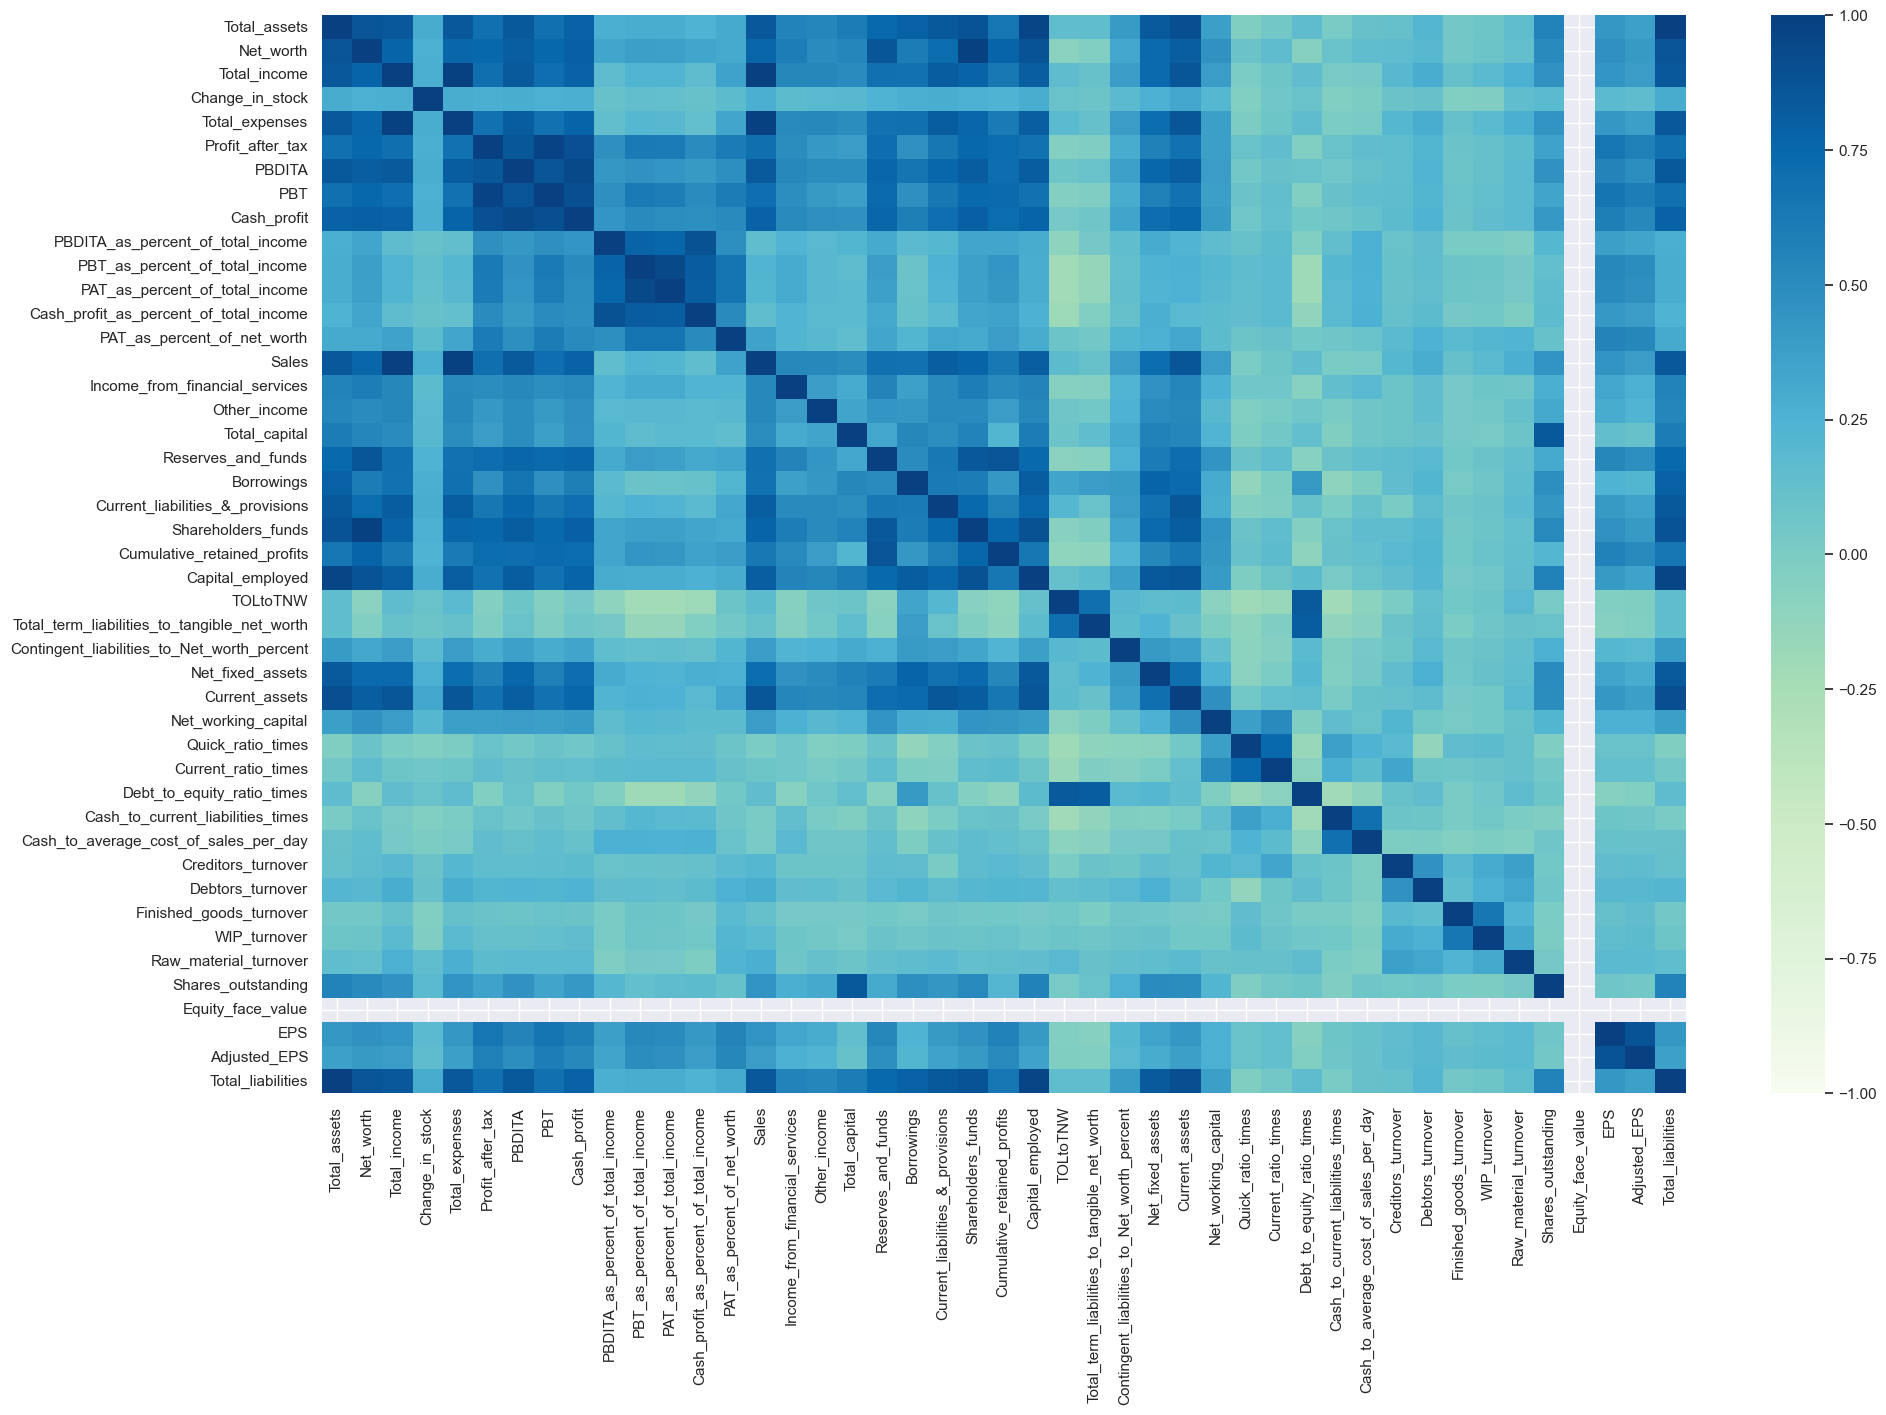

In [26]:
# checking correlation between independent variables 
plt.figure(figsize=(22,14))
cor_matrix = fdf.drop("Default", axis=1).corr()
sns.heatmap(cor_matrix, cmap='GnBu',vmin=-1, vmax=1)
plt.show()

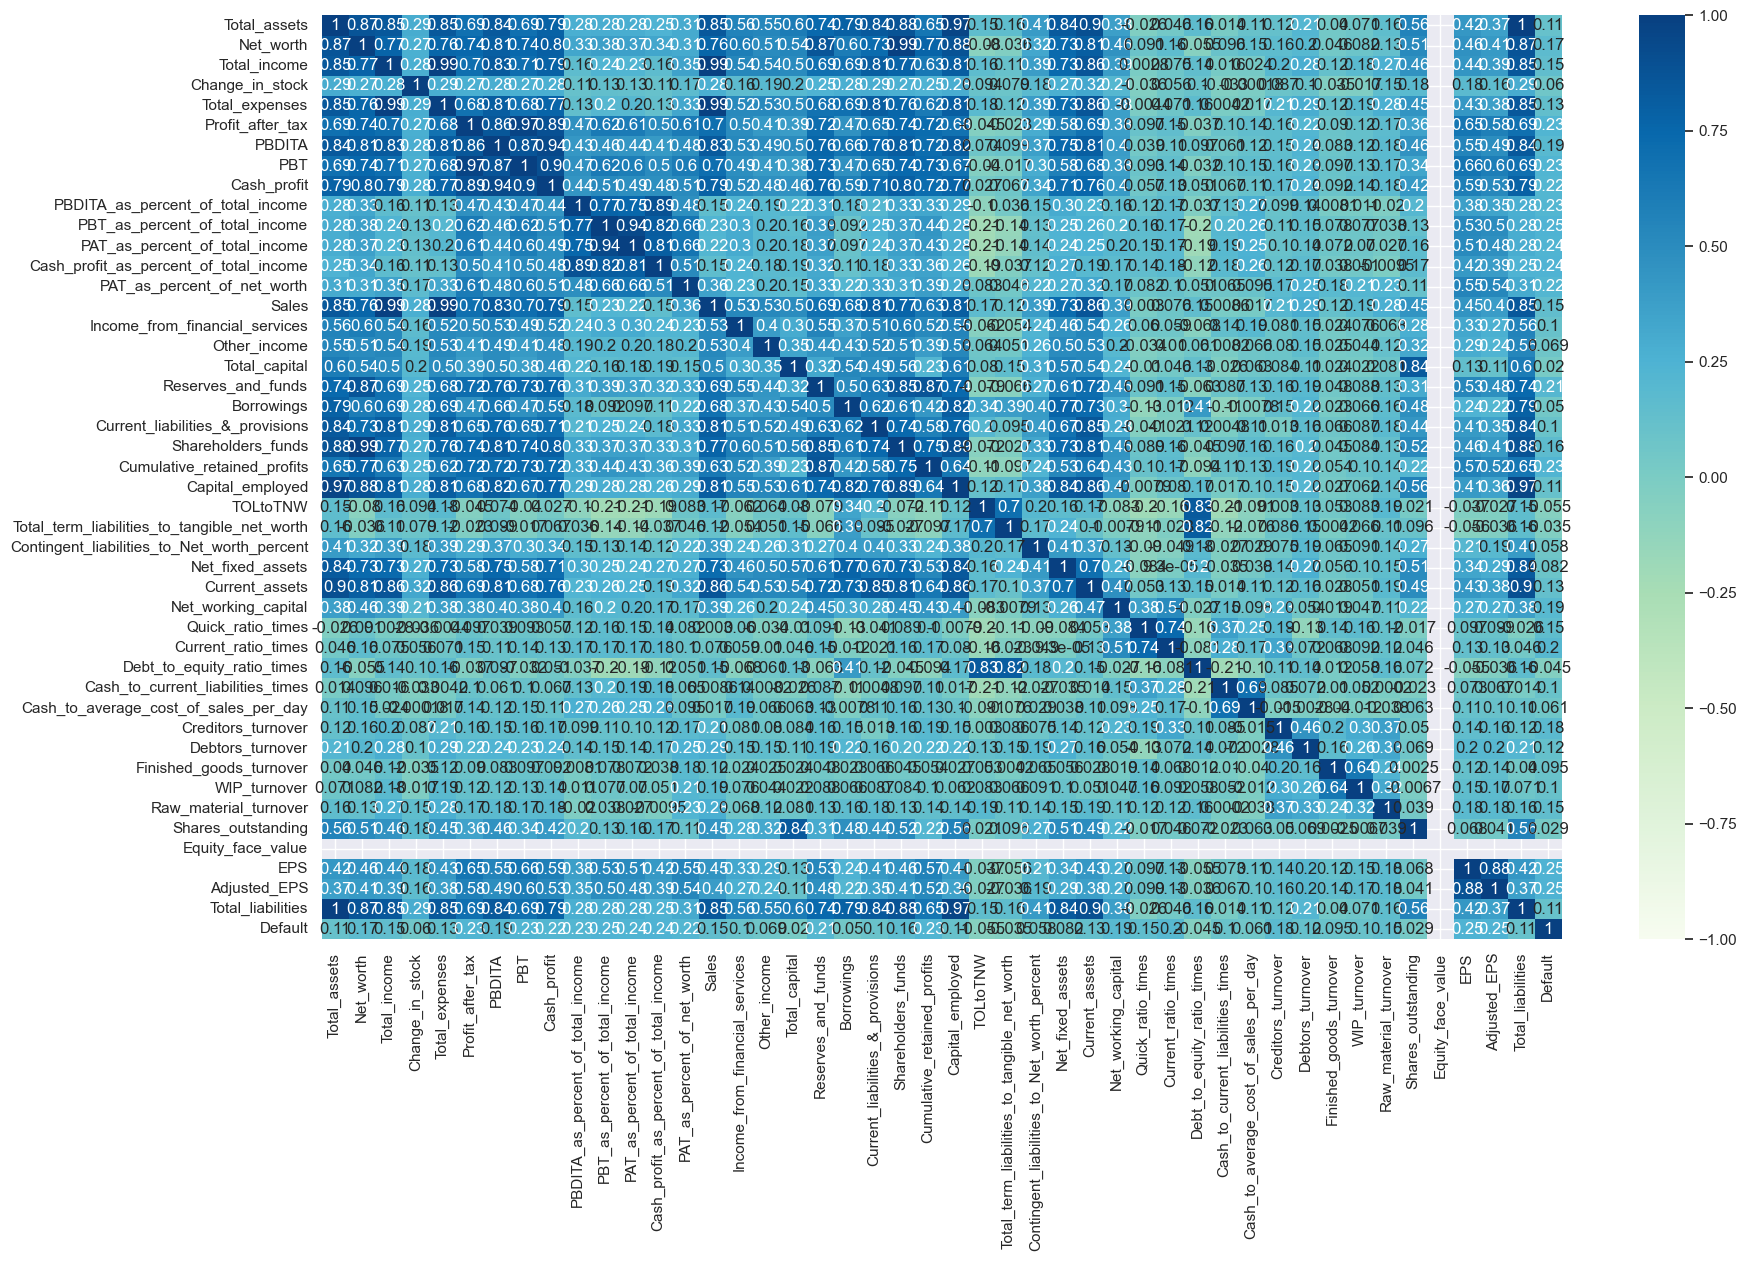

In [27]:
plt.figure(figsize=(20,12))
sns.heatmap(fdf.corr(), cmap='GnBu',annot=True,vmin=-1, vmax=1)
plt.show()

In [28]:
# splitting the data set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(isx, y, test_size=0.2, random_state=40, stratify=y) 

In [29]:
# modelling a Logistic regression with recursive feature elemination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logi=LogisticRegression()

In [30]:
# Feature selection with Logistic Regression
select= RFE(estimator=logi, n_features_to_select=16, step=3)

In [31]:
#  training with logi and RFE
selector=select.fit(x_train, y_train)

In [32]:
selector.n_features_

16

In [33]:
selector.ranking_

array([ 8,  1,  4,  1,  1,  2,  1,  3,  1,  2,  1,  1,  7,  9,  1,  6, 10,
        1,  1,  3,  5,  5,  1,  7, 10, 11,  6,  1,  4,  1,  9,  6,  7,  3,
       10,  1,  4,  8, 11,  5,  1, 11,  1,  9,  8])

In [34]:
# creating dataframe of feature importance  rank and the respective columns
featuredf=pd.DataFrame({"Feature":isx.columns, "Rank":selector.ranking_})
featuredf

,Feature,Rank
0,Total_assets,8
1,Net_worth,1
2,Total_income,4
3,Change_in_stock,1
4,Total_expenses,1
5,Profit_after_tax,2
6,PBDITA,1
7,PBT,3
8,Cash_profit,1
9,PBDITA_as_percent_of_total_income,2


In [35]:
featuredf[featuredf["Rank"]==1]

,Feature,Rank
1,Net_worth,1
3,Change_in_stock,1
4,Total_expenses,1
6,PBDITA,1
8,Cash_profit,1
10,PBT_as_percent_of_total_income,1
11,PAT_as_percent_of_total_income,1
14,Sales,1
17,Total_capital,1
18,Reserves_and_funds,1


In [36]:
featuredf[featuredf["Rank"]==1].shape

(16, 2)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score

def Evaloriginaldata(model):
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    
    print("Accuracy Score---------")
    print("Train",accuracy_score(y_train, y_pred_train))
    print("Test",accuracy_score(y_test, y_pred_test))
    print("---------"*10)
    
    print("roc_auc_score---------")
    print("Train",roc_auc_score(y_train, y_pred_train))
    print("Test",roc_auc_score(y_test, y_pred_test))
    print("---------"*10)
    
    print("Classification Report---------")
    print("Train",classification_report(y_train, y_pred_train))
    print("Test",classification_report(y_test, y_pred_test))
    print("---------"*10)
    
    print("ConfusionMatrix")
    train_cm = confusion_matrix(y_train, y_pred_train)
    test_cm = confusion_matrix(y_test, y_pred_test)

    print("Confusion Matrix Display for Training Data:")
    print(train_cm)

    print("\nConfusion Matrix Display for Test Data:")
    print(test_cm)


In [38]:
# evaluation the model
Evaloriginaldata(selector)

Accuracy Score---------
Train 0.9385593220338984
Test 0.9407616361071932
------------------------------------------------------------------------------------------
roc_auc_score---------
Train 0.6016898149957403
Test 0.5997680890538033
------------------------------------------------------------------------------------------
Classification Report---------
Train               precision    recall  f1-score   support

           0       0.66      0.21      0.32       194
           1       0.94      0.99      0.97      2638

    accuracy                           0.94      2832
   macro avg       0.80      0.60      0.64      2832
weighted avg       0.93      0.94      0.92      2832

Test               precision    recall  f1-score   support

           0       0.77      0.20      0.32        49
           1       0.94      1.00      0.97       660

    accuracy                           0.94       709
   macro avg       0.86      0.60      0.65       709
weighted avg       0.93      0.9

In [39]:
fdf["Default"].value_counts(normalize=True)

Default
1    0.931375
0    0.068625
Name: proportion, dtype: float64

In [40]:
# the class are in the data are pretty unbalanced # lets try over sampling and check if that helps 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33)
x_sm, y_sm = sm.fit_resample(x_train, y_train)

In [41]:
y_sm.value_counts()

Default
1    2638
0    2638
Name: count, dtype: int64

In [42]:
selectoros=select.fit(x_sm, y_sm)

In [43]:
Evaloriginaldata(selectoros)

Accuracy Score---------
Train 0.813912429378531
Test 0.8194640338504936
------------------------------------------------------------------------------------------
roc_auc_score---------
Train 0.8523580813330937
Test 0.8180117501546074
------------------------------------------------------------------------------------------
Classification Report---------
Train               precision    recall  f1-score   support

           0       0.26      0.90      0.40       194
           1       0.99      0.81      0.89      2638

    accuracy                           0.81      2832
   macro avg       0.62      0.85      0.64      2832
weighted avg       0.94      0.81      0.86      2832

Test               precision    recall  f1-score   support

           0       0.25      0.82      0.38        49
           1       0.98      0.82      0.89       660

    accuracy                           0.82       709
   macro avg       0.62      0.82      0.64       709
weighted avg       0.93      0.82

#  Random Forest classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfclss=RandomForestClassifier()


In [45]:
# witout oversampling

rfmodel=RFE(rfclss,n_features_to_select=15, step=1)
selctRF=rfmodel.fit(x_train, y_train)

In [46]:
Evaloriginaldata(selctRF)

Accuracy Score---------
Train 0.9992937853107344
Test 0.9407616361071932
------------------------------------------------------------------------------------------
roc_auc_score---------
Train 0.9948453608247423
Test 0.7036796536796537
------------------------------------------------------------------------------------------
Classification Report---------
Train               precision    recall  f1-score   support

           0       1.00      0.99      0.99       194
           1       1.00      1.00      1.00      2638

    accuracy                           1.00      2832
   macro avg       1.00      0.99      1.00      2832
weighted avg       1.00      1.00      1.00      2832

Test               precision    recall  f1-score   support

           0       0.60      0.43      0.50        49
           1       0.96      0.98      0.97       660

    accuracy                           0.94       709
   macro avg       0.78      0.70      0.73       709
weighted avg       0.93      0.9

In [47]:
# trying with cross-vlaidation witout oversampling
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(selctRF, x_train, y_train, cv=10)
print("All 10 accuracy", cvs)
print("Avg Training Acc", cvs.mean())
print("Max Training Acc", cvs.max())

All 10 accuracy [0.94366197 0.95422535 0.94699647 0.93639576 0.9540636  0.94699647
 0.95759717 0.95759717 0.95053004 0.95053004]
Avg Training Acc 0.9498594037724579
Max Training Acc 0.9575971731448764


In [48]:
# checking with oversampling
selctRFOS=rfmodel.fit(x_sm, y_sm)

In [49]:
Evaloriginaldata(selctRFOS)

Accuracy Score---------
Train 0.9989406779661016
Test 0.9167842031029619
------------------------------------------------------------------------------------------
roc_auc_score---------
Train 0.999431387414708
Test 0.7569264069264068
------------------------------------------------------------------------------------------
Classification Report---------
Train               precision    recall  f1-score   support

           0       0.98      1.00      0.99       194
           1       1.00      1.00      1.00      2638

    accuracy                           1.00      2832
   macro avg       0.99      1.00      1.00      2832
weighted avg       1.00      1.00      1.00      2832

Test               precision    recall  f1-score   support

           0       0.42      0.57      0.49        49
           1       0.97      0.94      0.95       660

    accuracy                           0.92       709
   macro avg       0.70      0.76      0.72       709
weighted avg       0.93      0.92

In [50]:
# trying with cross-vlaidation witout oversampling
cvsOS=cross_val_score(selctRFOS, x_sm, y_sm, cv=10)
print("All 10 accuracy", cvsOS)
print("Avg Training Acc", cvsOS.mean())
print("Max Training Acc", cvsOS.max())

All 10 accuracy [0.94886364 0.96401515 0.9469697  0.95643939 0.95454545 0.96780303
 0.9658444  0.96204934 0.95066414 0.96774194]
Avg Training Acc 0.9584936173883044
Max Training Acc 0.9678030303030303
